# Problem Set 6 
### Tyler Amos

###### 25 February 2018

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
import graphviz
from sklearn.metrics import mean_squared_error
link = 'https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/04d1cc45ffbcd413bacfb866feadc29346a59f6b/ProblemSets/PS6/biden.csv'
df = pd.read_csv(link).dropna()
df.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


# (a)

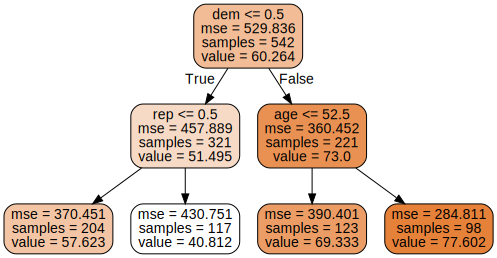

In [38]:
# TRAIN TEST SPLIT
response = ['biden']
predictor =  [i for i in df.columns if i != 'biden']
x = df[predictor]
y = df[response]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.70, 
                                                    random_state=4)
tree_a = DecisionTreeRegressor(max_depth = 2, random_state = 4)
tree_a.fit(x_train, y_train)
tree_a_figure = export_graphviz(tree_a,out_file=None,
    feature_names=predictor,
    rounded=True,
    filled=True)
graph = graphviz.Source(tree_a_figure)
graph.render('(a)')
graph

In [66]:
y_pred = tree_a.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE for this tree is: ', MSE)

Test MSE for this tree is:  586.6944396331949


## Interpretation

With $m = 2$ we see a low Mean Squared Error, relative to $m \in \{3,4,5\}$ thus this interpretation uses a tree with $m=2$. 

```dem ``` :This feature tells us that an individual is more likely to favour Biden if they are a Democrat, that is if they are coded 1 for the variable ```dem```. 

```rep```: If ```dem``` is coded as 0, the next node indicates whether an individual is a Republican. This, in combination with the previous node, aligns with intuitive understandings of partisanship in American politics. If an individual is a Democrat they are not a Republican, and vice-versa.

```age```: On the other side, ```age``` appears to have a slight positive correlation with Biden scores. Overall, Biden scores well among Democrats both young and old, with substantial numbers of individuals and high Biden values. 

Comparing values across the leaf nodes, we see results which confirm our intuition: Republicans generally feel cooler towards Biden, while independents are warmer, and Democrats, especially older Democrats, are most warm. 


# (b)

In [64]:
# Trying to approximate the R defaults as described by: https://cran.r-project.org/web/packages/tree/tree.pdf
#nobs = x_train.shape[0]
# To save space in the printout, we will take it at 50. 
# The MSE value converges after 10, which running the above code will show.
nobs = 50
for i in range(1,nobs):
    tree_b = DecisionTreeRegressor(min_samples_leaf=10, min_samples_split = 20, max_depth=i, random_state = 4)
    tree_b.fit(x_train, y_train)
    y_pred = tree_b.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    print('Max Depth {}, MSE is {}'.format(i, MSE))

Max Depth 1, MSE is 442.5054866797142
Max Depth 2, MSE is 413.2542634505241
Max Depth 3, MSE is 419.85799294417177
Max Depth 4, MSE is 427.7379481766907
Max Depth 5, MSE is 447.98573125316153
Max Depth 6, MSE is 453.4229039145542
Max Depth 7, MSE is 461.119174633719
Max Depth 8, MSE is 462.4738810377854
Max Depth 9, MSE is 463.63789037770954
Max Depth 10, MSE is 464.77613713799315
Max Depth 11, MSE is 464.77613713799315
Max Depth 12, MSE is 464.77613713799315
Max Depth 13, MSE is 464.77613713799315
Max Depth 14, MSE is 464.77613713799315
Max Depth 15, MSE is 464.77613713799315
Max Depth 16, MSE is 464.77613713799315
Max Depth 17, MSE is 464.77613713799315
Max Depth 18, MSE is 464.77613713799315
Max Depth 19, MSE is 464.77613713799315
Max Depth 20, MSE is 464.77613713799315
Max Depth 21, MSE is 464.77613713799315
Max Depth 22, MSE is 464.77613713799315
Max Depth 23, MSE is 464.77613713799315
Max Depth 24, MSE is 464.77613713799315
Max Depth 25, MSE is 464.77613713799315
Max Depth 26, MS

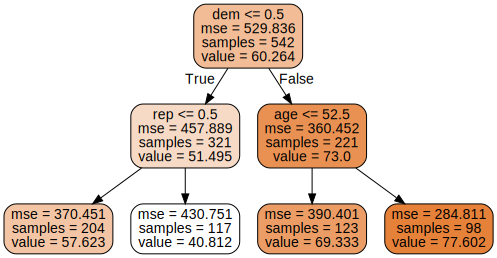

In [65]:
tree_b = DecisionTreeRegressor(max_depth = 2, random_state = 4)
tree_b.fit(x_train, y_train)
tree_b_figure = export_graphviz(tree_b,out_file=None,
    feature_names=predictor,
    rounded=True,
    filled=True)
graph = graphviz.Source(tree_b_figure)
graph.render('(b)')
graph

In [62]:
y_pred = tree_b.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE for this tree is: ', MSE)

Test MSE for this tree is:  413.2542634505241


Pruning does improve the test MSE for this tree. By taking the value for ```max_depth``` at the lowest MSE, we are able to prune the tree to the optimal depth. 


# (c)

In [188]:
tree_c = BaggingRegressor(DecisionTreeRegressor(), 
                          random_state = 4, n_estimators = 150,
                          max_samples = 150, bootstrap = True, 
                          oob_score = True)

tree_c.fit(x_train, np.ravel(y_train))
y_pred = tree_c.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
importances = np.mean([i.feature_importances_ for i in tree_c.estimators_
], axis = 0)
indices = np.argsort(importances)[::-1]
# From http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

print('MSE for this tree is: ', MSE)
print("\nFeature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, predictor[f], importances[indices[f]]))

MSE for this tree is:  436.95726687991015

Feature ranking:
1. female (0.437709)
2. age (0.206769)
3. educ (0.173775)
4. dem (0.122954)
5. rep (0.058792)


The variable importance measures above indicate that an individual's sex, ```female``` is the most reliable way to explain an individual's warmth towards Joe Biden. This squares well with previous research on the topic (http://www.people-press.org/2015/04/07/a-deep-dive-into-party-affiliation/). 

The next most reliable way to explain an individual's level of warmth towards Biden is their ```age```, which also aligns with intuitive understandings of American politics - younger people tend to favour the Democrats, older people tend to favour the Republicans.



# (d)

In [84]:
# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 1, random_state=4, n_estimators = 50, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 1 is: ', MSE)

MSE for m = 1 is:  515.8176063542131


In [85]:
# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 2, random_state=4, n_estimators = 50, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 2 is: ', MSE)

MSE for m = 2 is:  510.1143487089315


In [86]:
# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 3, random_state=4, n_estimators = 50, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 3 is: ', MSE)

MSE for m = 3 is:  505.9251510334366


In [87]:
importances = np.mean([i.feature_importances_ for i in regr.estimators_
], axis = 0)
indices = np.argsort(importances)[::-1]
# From http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
print("\nFeature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, predictor[f], importances[indices[f]]))


Feature ranking:
1. female (0.451502)
2. age (0.206694)
3. educ (0.170652)
4. dem (0.128541)
5. rep (0.042611)


Once again, we see that ```female``` is on the whole the most influential variable in explaining warmth towards Biden. The next most important variable appears to be ```age```, followed by education and party affiliation. 

As $m$ grows it appears to improve MSE, that is it decreases the error by including more explanatory variables. 